5 10


(array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.02986125,  0.04784495,  0.03943737,  0.        ,
          0.01058795,  0.01204783,  0.01317908,  0.01395083,  0.01434205,
          0.01434205,  0.01395083,  0.01317908,  0.01204783,  0.01058795,
          0.00883926,  0.00684945,  0.00467282,  0.00236871,  0.        ],
        [ 0.        ,  0.04717597,  0.07558731,  0.06230469,  0.        ,
          0.02002853,  0.02279009,  0.02493   ,  0.02638988,  0.02712991,
          0.02712991,  0.02638988,  0.02493   ,  0.02279009,  0.02002853,
          0.01672065,  0.01295667,  0.00883926,  0.00448074,  0.        ],
        [ 0.        ,  0.03826596,  0.06131132,  0.05053735,  0.        ,
          0.02729871,  0.0310627 , 

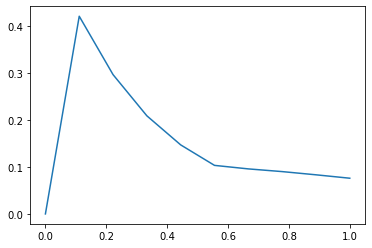

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import time as clock
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
%matplotlib inline


# initial field
def init(Nd):
    for i in range(0, Nd):
        for j in range(0, Nd):
            T[i][j] = np.sin(2*np.pi*x[i])*np.sin(np.pi*y[j])
    return T
# exact field       
def exact(arg, Nd):
    for i in range(0, Nd):
        for j in range(0, Nd):
            T_exact[i][j] = np.exp(-np.pi*arg)*np.sin(2*np.pi*x[i])*np.sin(np.pi*y[j])
    return T_exact


def twodim(Nd, Pd):
    print(Nd, Pd)
    alfa = np.zeros(Nd)
    beta = np.zeros(Nd)
    delta = np.zeros(Pd)

    T = np.zeros((Nd, Nd))
    T_exact = np.zeros((Nd, Nd))
    delta = np.zeros(Pd)
    
    x = np.linspace(0, 1, Nd)
    y = np.linspace(0, 1, Nd)
    t = np.linspace(0, 1, Pd)
    
    h = 1/(Nd-1)
    tau = 1/(Pd-1)
    
    T = init(Nd)    
    m = 0
    for time in np.linspace(0, 1, Pd):
        
        T_exact = exact(time, Nd)
        delta[m] = np.max(abs(T-T_exact))
        
        m += 1
        for j in range (0, Nd):

            alfa[0] = 0
            beta[0] = 0

            for i in range (1, Nd-1):

                ai = k / h**2
                bi = 2 * k / h**2 + 1 / tau
                fi = - T[i, j] / tau

                alfa[i] = ai / (bi - ai * alfa[i - 1])
                beta[i] = (ai * beta[i - 1] - fi) / (bi - ai * alfa[i - 1])
                
            T[Nd-1, j] = 0
            
            for i in range (Nd-2, -1, -1):
                T[i,j] = alfa[i] * T[i + 1, j] + beta[i]
        
                
        for i in range(1, Nd-1):

            alfa[0] = 0
            beta[0] = 0

            for j in range (1, Nd-1):

                ai = k / h ** 2
                bi = 2 * k/ h ** 2 + 1 / tau
                fi = - T[i, j] / tau

                alfa[j] = ai / (bi - ai * alfa[j - 1])
                beta[j] = (ai * beta[j - 1] - fi) / (bi - ai * alfa[j - 1])
            
#             T[i, N-1] = (2.0 * k * tau * beta[N-1] + h**2 * T[i, N-1]) / (2.0 * k * tau * (1.0 - alfa[N-1]) + h**2)
            T[i, Nd-1] = 0
            
            for j in range (Nd-2, -1, -1):
                T[i, j] = alfa[j] * T[i, j + 1] + beta[j]

    plt.plot(t, delta)  
    return T, delta

twodim(5, 10)

# fig, ax = plt.subplots(1, 1, figsize=(10, 10), constrained_layout=True)
       
# p2 = ax.imshow(T, cmap='plasma', aspect='equal', interpolation='gaussian', origin="lower")    

# fig.colorbar(p2)
# ax.set_title('Temperature Field')

# fig.canvas.draw()

# plt.plot(delta)

#добавить цикл в котором будет изменяться сетка и из цикла будет выписываться лишь одно значение ошибки
#сдлеать график ошибки от времени для всех шагов

In [72]:
arr = np.array([[5, 10], [10, 40], [20, 160]])
for n in arr:
    print(n[0])

5
10
20


5 10
10 40
20 160


0

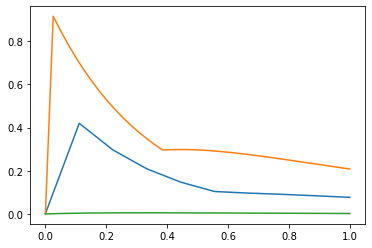

In [93]:

def err():
    arr = np.array([[5, 10, 1], [10, 40, 2], [20, 160, 3]])
    for n in arr:
        twodim(n[0],n[1])
        
        
    return 0
  
err()


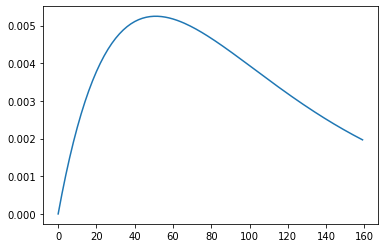

In [54]:
twodim(5,20)
plt.plot(delta)

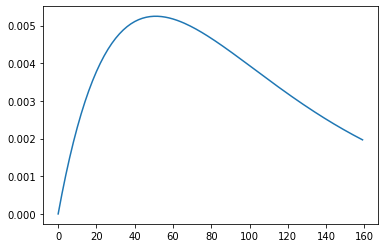

In [55]:
twodim(10,40)
plt.plot(delta)